# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 5)

# Load the Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Projects/Earnings Prediction Project/NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_data.shape)
print(df_data.columns)

(2000, 96)
Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBAR

In [ ]:
print(f"Nan values exist: {df_data.isna().values.any()}")
print(f"Duplicate values exist: {df_data.duplicated().values.any()}")

Nan values exist: True
Duplicate values exist: True


In [ ]:
df_data.head()

,ID,EARNINGS,...,MSA11NK,MSA11NIC
0,4275,18.50,...,0,0
1,4328,19.23,...,0,0
2,8763,39.05,...,0,0
3,8879,16.80,...,0,0
4,1994,36.06,...,0,0


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
df_data.drop_duplicates(inplace=True)
df_data.shape

(1487, 96)

In [ ]:
# Removing maximum limitions so google colab shows us all the sums for missing values in columns
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)

df_data.isna().sum().sort_values(ascending=False).head(20)
# Checking the variable meanings from Variable_Name_and_Descriptions.csv
# we will not be needing these variables for our analysis so it's safe to set them to 0 or completely ignore them 

# setting limitations back on
pd.set_option('max_colwidth', 10)
pd.set_option('max_rows', 10)

df_data.fillna(0, inplace=True)
df_data.isna().values.any()

False

## Descriptive Statistics

In [ ]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,PRFSTYAN,PRFSTYAE,SINGLE,MARRIED,COHABIT,OTHSING,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO,FAITHM,ASVABAR,ASVABWK,ASVABPC,ASVABMK,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",293.07,0.67,0.09,0.02,0.18,0.03,0.01,0.20,0.53,0.26,0.01,0.12,0.11,0.77,0.01,0.00,0.08,0.31,0.09,0.39,0.07,0.04,5.61,3.51,0.11,0.29,0.10,0.24,0.10,0.19,0.12,0.20,0.33,0.42,0.19,0.07,0.02,0.57,0.31,0.01,0.02,0.06,0.22,0.16,0.16,0.20,0.15,0.15,0.21,0.20,0.17,"56,113.32",68.02,168.49,181.56,13.32,13.38,10.95,12.91,2.23,0.17,0.31,0.31,0.21,0.29,0.71,0.00,5.75,39.10,3.56,0.11,0.74,0.08,0.07,0.07,0.12,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",300.53,0.47,0.28,0.14,0.38,0.16,0.12,0.40,0.50,0.44,0.09,0.33,0.32,0.42,0.12,0.05,0.27,0.46,0.29,0.49,0.26,0.19,5.37,4.51,0.31,0.46,0.30,0.43,0.30,0.39,0.32,0.40,0.47,0.49,0.39,0.25,0.15,0.50,0.46,0.11,0.15,0.24,0.93,0.94,0.95,0.96,0.99,0.97,0.93,0.94,0.94,"27,943.95",4.11,41.62,46.75,2.95,2.63,6.01,3.67,1.72,0.38,0.46,0.46,0.41,0.45,0.45,0.00,3.36,10.90,2.63,0.32,0.44,0.27,0.25,0.25,0.32,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,-3.11,-2.61,-2.99,-3.87,-4.87,-3.05,-2.91,-2.89,0.00,59.00,90.00,90.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",79.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,-0.45,-0.44,-0.39,-0.51,-0.53,-0.33,-0.37,-0.44,"33,169.50",65.00,140.00,147.00,12.00,12.00,10.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,37.00,1.21,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",251.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0

## Visualise the Features

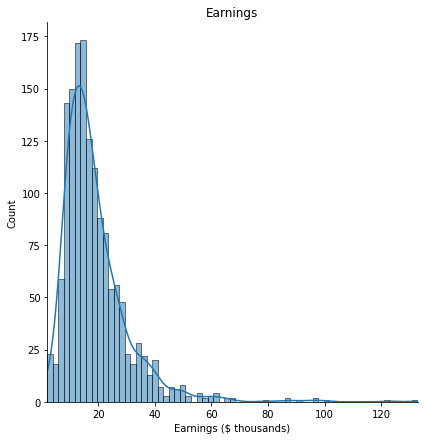

In [ ]:
 ax = sns.displot(x=df_data["EARNINGS"],
            kde=True,
            height=6,
            )

plt.xlim(df_data.EARNINGS.min(), df_data.EARNINGS.max())
plt.title("Earnings")
plt.xlabel("Earnings ($ thousands)")
plt.show()

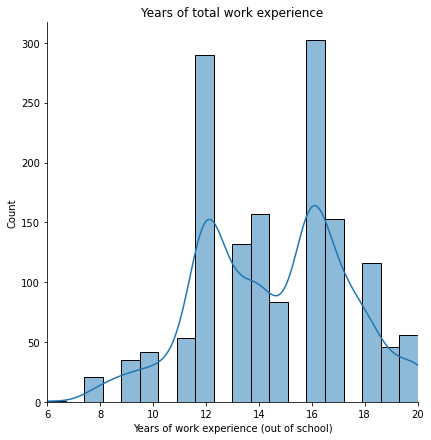

In [ ]:
 ax = sns.displot(x=df_data["S"],
            kde=True,
            height=6,
            )

plt.xlim(df_data.S.min(), df_data.S.max())
plt.title("Years of schooling experience")
plt.xlabel("Years of work experience (out of school)")
plt.show()

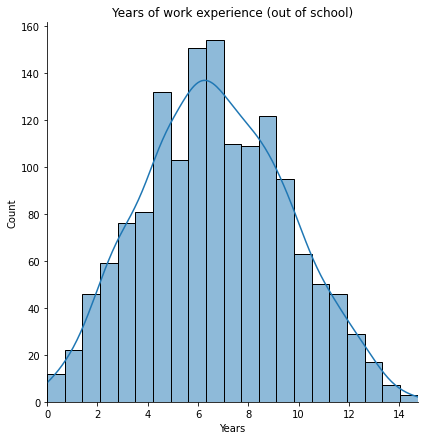

In [ ]:
 ax = sns.displot(x=df_data["EXP"],
            kde=True,
            height=6,
            )

plt.xlim(df_data.EXP.min(), df_data.EXP.max())
plt.title("Years of work experience (out of school)")
plt.xlabel("Years")
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
# We are trying to predict earnings
target = df_data["EARNINGS"]

# Our feature is the variable S - Years of schooling (highest grade completed as of 2011)
features = df_data["S"]

Xtrain, Xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size=0.2,
                                                random_state=10)

print(Xtrain.shape) # we have no 

# reshaping the arrays for single feature regression
Xtrain = Xtrain.values.reshape(-1, 1)

ytrain = ytrain.values.reshape(-1, 1)

print(Xtrain.shape) # now we have organized the data so LinearRegression can understand it

(1189,)
(1189, 1)


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
simple_reg = LinearRegression().fit(Xtrain, ytrain)

r_squared = simple_reg.score(Xtrain, ytrain)
print(f"The R Squared for the regression is {r_squared:.4f}")
# our coefficient of determination is very low, meaning most of the data points in the set can not be solely explained by years of education

The R Squared for the regression is 0.0809


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 


In [ ]:
coefficient = round(simple_reg.coef_[0][0], 3)
print(coefficient)

1.219


In [ ]:
print(f"Once can expect to earn ${coefficient*1000:.0f} more per additional year of schooling")

Once can expect to earn $1219 more per additional year of schooling


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values = simple_reg.predict(Xtrain)
residuals = (ytrain - predicted_values)

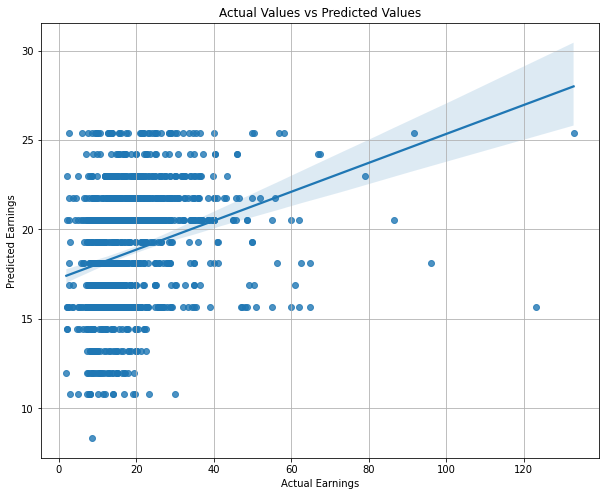

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Actual Values vs Predicted Values")
plt.ylabel("Predicted Earnings")
plt.xlabel("Actual Earnings")
plt.grid("grey")

ax = sns.regplot(x=ytrain,
                     y=predicted_values)
  
plt.show()

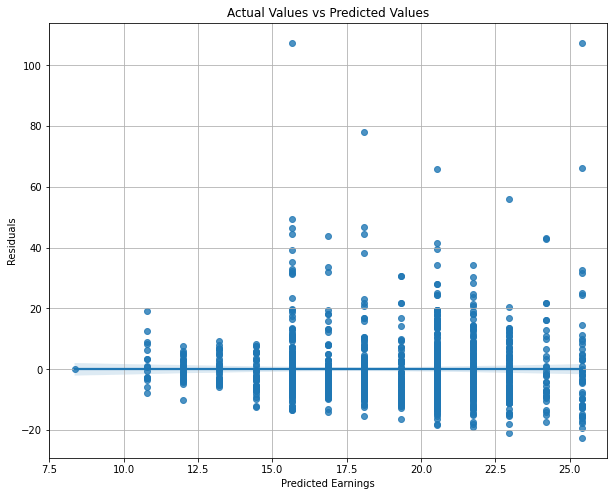

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Actual Values vs Predicted Values")
plt.ylabel("Residuals")
plt.xlabel("Predicted Earnings")
plt.grid("grey")

ax = sns.regplot(x=predicted_values,
                 y=residuals)
  
plt.show()

We can clearly see that the simple linear regression with only one feature doesn't fare well when estimating the earnings. Clear pattern visible with the residuals means that the model has a systematic bias.

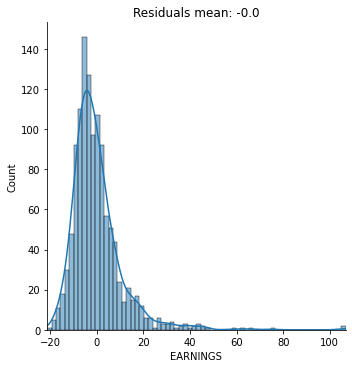

In [ ]:
mean = round(residuals.mean(), 2)

sns.displot(residuals,
            kde=True
            )

plt.xlim(residuals.min(), residuals.max())
plt.title(f"Residuals mean: {mean}")
plt.show()



# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
# target is still the earnings
# features are:
# 1. S           Years of schooling (highest grade completed as of 2011)
# 2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
features = df_data[["S", "EXP"]]

Xtrain, Xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size=0.2,
                                                random_state=10
                                                )

In [ ]:
reg = LinearRegression().fit(Xtrain, ytrain)
r_squared = reg.score(Xtrain, ytrain)
print(f"The coefficient of determination is {r_squared:.3f}")

The coefficient of determination is 0.117


### Evaluate the Coefficients of the Model

In [ ]:
coefficients = pd.DataFrame(data=reg.coef_,
                            index=Xtrain.columns,
                            columns=["Coefficients"]
                            )
coefficients

,Coefficients
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_values = reg.predict(Xtrain)
residuals = (ytrain - predicted_values)

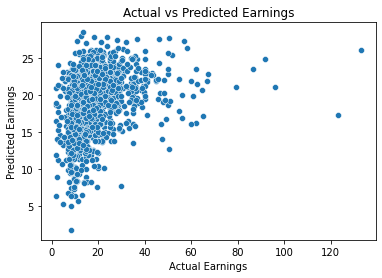

In [ ]:
plt.title("Actual vs Predicted Earnings")
plt.xlabel("Actual Earnings")
plt.ylabel("Predicted Earnings")

sns.scatterplot(x=ytrain,
                y=predicted_values)
plt.show()

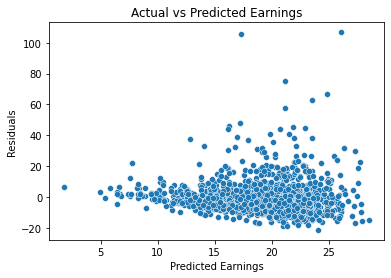

In [ ]:
plt.title("Actual vs Predicted Earnings")
plt.xlabel("Predicted Earnings")
plt.ylabel("Residuals")

sns.scatterplot(x=predicted_values,
                y=residuals)
plt.show()

Let's analyse the distribution of the residuals. The skew and mean specifically.

In [ ]:
mean = round(residuals.mean(), 2)
skew = round(residuals.skew(), 2)

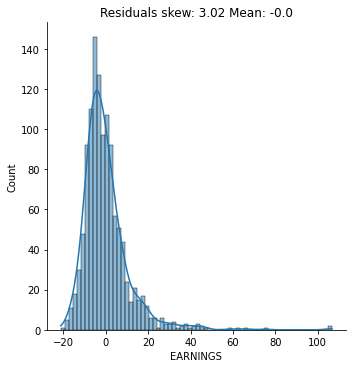

In [ ]:
sns.displot(residuals,
            kde=True)

plt.title(f"Residuals skew: {skew} Mean: {mean}")
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
prediction_stats = pd.DataFrame(data=np.array([16, 5]).reshape(1, 2),
                                columns=["S", "EXP"]
                                )

prediction_stats

,S,EXP
0,16,5


In [ ]:
estimate = reg.predict(prediction_stats)[0]

dollar_value = estimate * 1000
print(f"Earnings estimate ${dollar_value:.2f}")

Earnings estimate $19714.79


# Investigating Further

Let's add some other features to help predict our target better.

In [ ]:
features_list = ["S", "EXP", "CATGOV", "CATPRI", "CATSE"]

features = df_data[features_list]

Xtrain, Xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size=0.2,
                                                random_state=10)

In [ ]:
reg = LinearRegression().fit(Xtrain, ytrain)
r_squared = reg.score(Xtrain, ytrain)
print(f"The coefficient of determination is : {r_squared:.3f}")

The coefficient of determination is : 0.165


In [ ]:
coefficients = pd.DataFrame(data=reg.coef_,
                            index=Xtrain.columns,
                            columns=["Coefficients"]
                            )
coefficients

,Coefficients
S,1.92
EXP,0.95
CATGOV,0.72
CATPRI,1.99
CATSE,10.13


By adding Tenure (years with the current employer) and employment categories Government, Private, and Self-employed we were able to improve the coefficient of determination with our linear regression model. From the coefficients we can see the differences between employer categories.

In [ ]:
prediction_stats = pd.DataFrame(data=np.array([16, 5, 0, 0 ,1]).reshape(1, 5),
                                columns=features_list)

prediction_stats

,S,EXP,CATGOV,CATPRI,CATSE
0,16,5,0,0,1


In [ ]:
estimate = reg.predict(prediction_stats)[0]

dollar_value = estimate * 1000
print(f"Earnings estimate ${dollar_value:.2f}")

Earnings estimate $27848.44
